<a href="https://colab.research.google.com/github/FedyaSamson/agfzb-CloudAppDevelopment_Capstone/blob/master/Python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання данних

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json = response.json()

Створення DataFrame

In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Пiдготовка даних

In [ ]:
df["at"] = pd.to_datetime(df["at"])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at": "Дата", "val": "Вакансії"})

In [ ]:
df.head()

,Дата,Вакансії
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [ ]:
df.set_index('Дата', inplace=True)

Побудова графiкiв

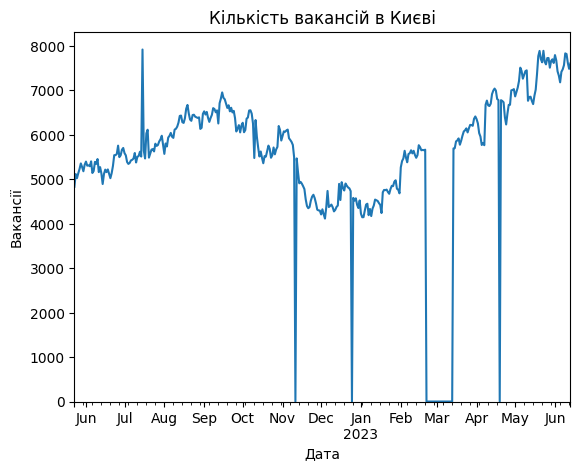

In [ ]:
df["Вакансії"].plot()
plt.title("Кiлькiсть вакансiй в Києві")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df["Вакансії"] = df['Вакансії'].replace(0, np.nan)
df['Вакансії'] = df["Вакансії"].interpolate()

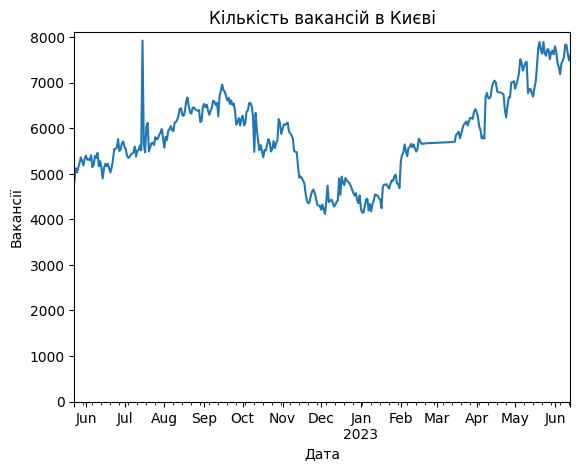

In [ ]:
df["Вакансії"].plot()
plt.title("Кiлькiсть вакансiй в Києві")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df['rolling_mean'] = df['Вакансії'].rolling(window=7).mean()

In [ ]:
df

,Вакансії,rolling_mean
Дата,,
2022-05-23,4831.0,NaN
2022-05-24,5118.0,NaN
2022-05-25,5025.0,NaN
2022-05-26,5134.0,NaN
2022-05-27,5233.0,NaN
...,...,...
2023-06-09,7833.0,7462.285714
2023-06-10,7818.0,7517.857143
2023-06-11,7618.0,7558.571429


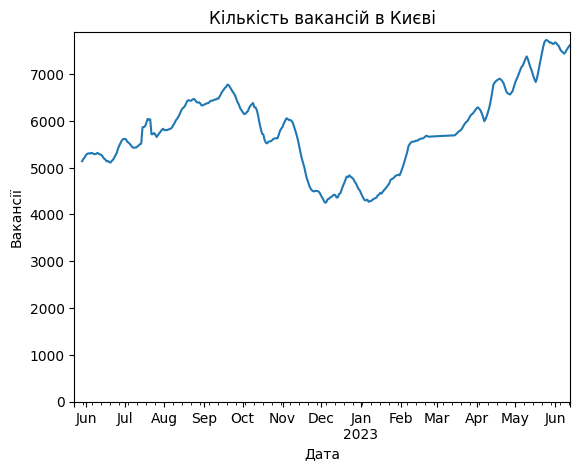

In [ ]:
df["rolling_mean"].plot()
plt.title("Кiлькiсть вакансiй в Києві")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df.describe()

,Вакансії,rolling_mean
count,387.000000,381.000000
mean,5816.724806,5808.536745
std,912.306537,880.827433
min,4116.000000,4253.428571
25%,5227.500000,5270.714286
50%,5693.681818,5729.714286
75%,6420.000000,6391.857143
max,7920.000000,7730.714286


Друга частина

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json = response.json()

In [ ]:
df_odesa = pd.DataFrame(data_json['data'])

In [ ]:
df_odesa.head()

,at,val
0,2022-05-23,808
1,2022-05-24,788
2,2022-05-25,808
3,2022-05-26,877
4,2022-05-27,904


In [ ]:
df_odesa["at"] = pd.to_datetime(df_odesa["at"])
df_odesa = df_odesa.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_odesa.set_index('Дата', inplace=True)
df_odesa["Вакансії"] = df_odesa['Вакансії'].replace(0, np.nan)
df_odesa['Вакансії'] = df_odesa["Вакансії"].interpolate()
df_odesa['rolling_mean'] = df_odesa['Вакансії'].rolling(window=7).mean()

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

In [ ]:
df_lviv = pd.DataFrame(data_json['data'])

In [ ]:
df_lviv.head()

,at,val
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [ ]:
df_lviv["at"] = pd.to_datetime(df_lviv["at"])
df_lviv = df_lviv.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_lviv.set_index('Дата', inplace=True)
df_lviv["Вакансії"] = df_lviv['Вакансії'].replace(0, np.nan)
df_lviv['Вакансії'] = df_lviv["Вакансії"].interpolate()
df_lviv['rolling_mean'] = df_lviv['Вакансії'].rolling(window=7).mean()

In [ ]:
df_lviv

,Вакансії,rolling_mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN
...,...,...
2023-06-09,1597.0,1538.714286
2023-06-10,1599.0,1543.714286
2023-06-11,1536.0,1545.571429


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Вакансії'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['rolling_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Вакансії'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['rolling_mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['Вакансії', 'rolling_mean']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['Дата', 'Вакансії', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['Дата', 'rolling_mean', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Дата', 'count()', None], **{})
chart

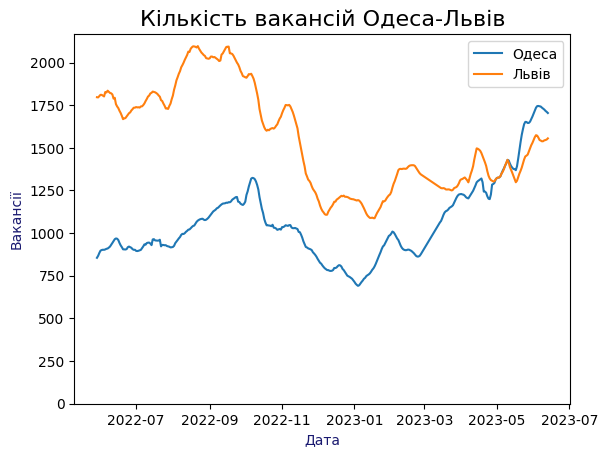

In [ ]:
fig, axs = plt.subplots()
axs.plot(df_odesa.index, df_odesa['rolling_mean'], label="Одеса")
axs.plot(df_lviv.index, df_lviv['rolling_mean'], label="Львів")
plt.title("Кiлькiсть вакансiй Одеса-Львів", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()

Домашня робота

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Дніпро")
data_json = response.json()

In [ ]:
df_dnieper = pd.DataFrame(data_json['data'])

In [ ]:
df_dnieper.head()

,at,val
0,2022-05-23,702
1,2022-05-24,726
2,2022-05-25,715
3,2022-05-26,742
4,2022-05-27,768


In [ ]:
df_dnieper["at"] = pd.to_datetime(df_dnieper["at"])
df_dnieper = df_dnieper.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_dnieper.set_index('Дата', inplace=True)
df_dnieper["Вакансії"] = df_dnieper['Вакансії'].replace(0, np.nan)
df_dnieper['Вакансії'] = df_dnieper["Вакансії"].interpolate()
df_dnieper['rolling_mean'] = df_dnieper['Вакансії'].rolling(window=7).mean()

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Харків")
data_json = response.json()

In [ ]:
df_kharkiv = pd.DataFrame(data_json['data'])

In [ ]:
df_kharkiv.head()

,at,val
0,2022-08-29,784
1,2022-08-30,802
2,2022-08-31,834
3,2022-09-01,828
4,2022-09-02,829


In [ ]:
df_kharkiv["at"] = pd.to_datetime(df_kharkiv["at"])
df_kharkiv = df_kharkiv.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_kharkiv.set_index('Дата', inplace=True)
df_kharkiv["Вакансії"] = df_kharkiv['Вакансії'].replace(0, np.nan)
df_kharkiv['Вакансії'] = df_kharkiv["Вакансії"].interpolate()
df_kharkiv['rolling_mean'] = df_kharkiv['Вакансії'].rolling(window=7).mean()

In [ ]:
df_kharkiv

,Вакансії,rolling_mean
Дата,,
2022-08-29,784.0,NaN
2022-08-30,802.0,NaN
2022-08-31,834.0,NaN
2022-09-01,828.0,NaN
2022-09-02,829.0,NaN
...,...,...
2023-06-09,1097.0,1076.714286
2023-06-10,1091.0,1079.428571
2023-06-11,1048.0,1078.428571


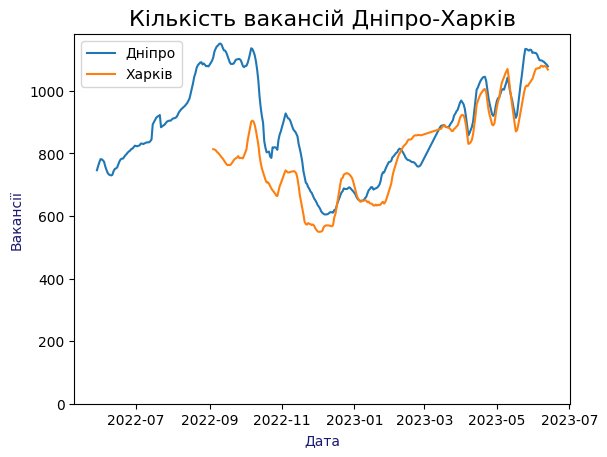

In [ ]:
fig, axs = plt.subplots()
axs.plot(df_dnieper.index, df_dnieper['rolling_mean'], label="Дніпро")
axs.plot(df_kharkiv.index, df_kharkiv['rolling_mean'], label="Харків")
plt.title("Кiлькiсть вакансiй Дніпро-Харків", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()